In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import time
from tensorflow.keras import layers

In [3]:
data=pd.read_csv('unsupervised_deep_learning_dataset.csv')

In [4]:
data

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,1,2,YES,71610,6510,13020,52080,Saab,92x,2004
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,0,0,?,5070,780,780,3510,Mercedes,E400,2007
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,0,1,NO,6500,1300,650,4550,Accura,RSX,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,...,0,1,?,87200,17440,8720,61040,Honda,Accord,2006
996,285,41,IL,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,...,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015
997,130,34,OH,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,...,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996
998,458,62,IL,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,...,0,1,YES,46980,5220,5220,36540,Audi,A5,1998


In [15]:
data['insured_sex'].dtype==np.object_

True

In [18]:
for col in data.columns:
    if data[col].dtype==np.object_:
        encode=LabelEncoder()
        encode.fit(data[col])
        data[col]=encode.transform(data[col])

In [20]:
data

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,2,1000,1406.91,0,1,4,2,17,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,0,1,1,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,13,...,0,1,0,87200,17440,8720,61040,6,6,2006
996,285,41,0,1000,1436.79,0,0,6,9,17,...,2,3,0,108480,18080,18080,72320,13,28,2015
997,130,34,2,500,1383.49,3000000,0,5,1,3,...,2,3,2,67500,7500,7500,52500,11,19,1996
998,458,62,0,2000,1356.92,5000000,1,0,5,0,...,0,1,2,46980,5220,5220,36540,1,5,1998


In [21]:
pd.crosstab(data.policy_state,data.insured_sex,margins=True)

insured_sex,0,1,All
policy_state,,,
0,179,159,338
1,163,147,310
2,195,157,352
All,537,463,1000


In [25]:
pd.Series(data.isnull().sum()).unique()

array([0])

In [30]:
list1=[]

for i in data.columns:
    null=sum(pd.isnull(data[i]))
    null1=i+'-'+str(null)
    list1.append(null1)

In [31]:
list1

['months_as_customer-0',
 'age-0',
 'policy_state-0',
 'policy_deductable-0',
 'policy_annual_premium-0',
 'umbrella_limit-0',
 'insured_sex-0',
 'insured_education_level-0',
 'insured_occupation-0',
 'insured_hobbies-0',
 'insured_relationship-0',
 'capital-gains-0',
 'capital-loss-0',
 'incident_type-0',
 'collision_type-0',
 'incident_severity-0',
 'authorities_contacted-0',
 'incident_state-0',
 'incident_city-0',
 'incident_hour_of_the_day-0',
 'number_of_vehicles_involved-0',
 'property_damage-0',
 'bodily_injuries-0',
 'witnesses-0',
 'police_report_available-0',
 'total_claim_amount-0',
 'injury_claim-0',
 'property_claim-0',
 'vehicle_claim-0',
 'auto_make-0',
 'auto_model-0',
 'auto_year-0']

In [32]:
mean=np.mean(data)

/home/shahid/anaconda3/envs/anomaly/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [34]:
std=np.std(data)

In [35]:
std

months_as_customer             1.150556e+02
age                            9.135715e+00
policy_state                   8.305444e-01
policy_deductable              6.115587e+02
policy_annual_premium          2.440453e+02
umbrella_limit                 2.296258e+06
insured_sex                    4.986291e-01
insured_education_level        1.947523e+00
insured_occupation             4.017038e+00
insured_hobbies                5.671211e+00
insured_relationship           1.680162e+00
capital-gains                  2.785825e+04
capital-loss                   2.809004e+04
incident_type                  1.080933e+00
collision_type                 1.063223e+00
incident_severity              9.392252e-01
authorities_contacted          1.531376e+00
incident_state                 2.154863e+00
incident_city                  2.043243e+00
incident_hour_of_the_day       6.947896e+00
number_of_vehicles_involved    1.018371e+00
property_damage                8.115639e-01
bodily_injuries                8

<Axes: ylabel='Frequency'>

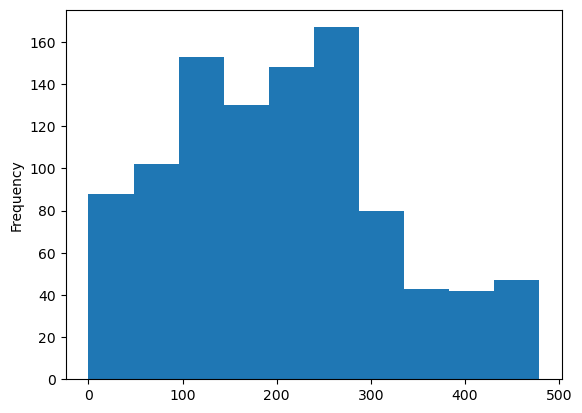

In [38]:
data.months_as_customer.plot(kind='hist')

<Axes: ylabel='Frequency'>

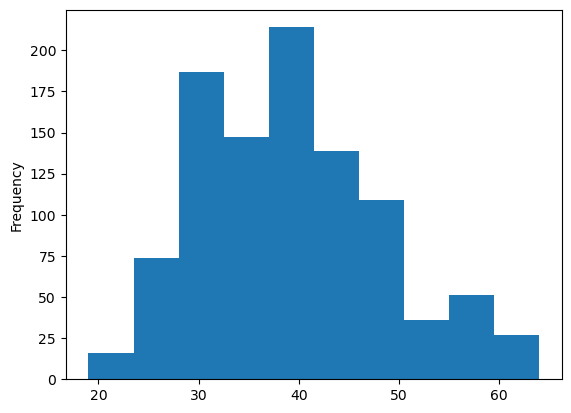

In [39]:
data.age.plot(kind='hist')

In [40]:
data=(data-mean)/std

In [43]:
data.shape[1]

32

In [52]:
input_layer=tf.keras.layers.Input(shape=(data.shape[1],))
encoded=tf.keras.layers.Dense(128,activation='relu')(input_layer)
encoded=tf.keras.layers.Dense(64,activation='relu')(encoded)    
encoded=tf.keras.layers.Dense(32,activation='relu')(encoded)
decoded=tf.keras.layers.Dense(64,activation='relu')(encoded)
decoded=tf.keras.layers.Dense(128,activation='relu')(decoded)
decoded=tf.keras.layers.Dense(data.shape[1],activation='sigmoid')(decoded)
autoencoder=tf.keras.models.Model(input_layer,decoded)
autoencoder.compile(optimizer='SGD',loss='mse') # in optimizer it is gradient descent


In [53]:
autoencoder.fit(data,data,epochs=200,batch_size=64)

Epoch 1/200
16/16 [==============================] - 1s 6ms/step - loss: 1.2520
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 1.2512
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 1.2503
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 1.2495
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 1.2487
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 1.2478
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 1.2470
Epoch 8/200
16/16 [==============================] - 0s 3ms/step - loss: 1.2462
Epoch 9/200
16/16 [==============================] - 0s 6ms/step - loss: 1.2454
Epoch 10/200
16/16 [==============================] - 0s 3ms/step - loss: 1.2445
Epoch 11/200
16/16 [==============================] - 0s 5ms/step - loss: 1.2437
Epoch 12/200
16/16 [==============================] - 0s 4ms/step - loss: 1.2429
Epoch 13/200
16/16 [=================

In [54]:
predictions=autoencoder.predict(data)

32/32 [==============================] - 0s 4ms/step


In [57]:
predictions.shape

(1000, 32)

In [64]:
reconstruction_error=np.mean((predictions-data)**2,axis=1)

In [67]:
reconstruction_error.mean()

0.9917349351174212

In [63]:
reconstruction_error

months_as_customer             0.987224
age                            0.982399
policy_state                   1.000917
policy_deductable              0.997791
policy_annual_premium          1.004010
umbrella_limit                 1.007369
insured_sex                    1.004868
insured_education_level        0.988147
insured_occupation             1.001082
insured_hobbies                0.999478
insured_relationship           1.001950
capital-gains                  0.994156
capital-loss                   0.993127
incident_type                  1.002904
collision_type                 0.969063
incident_severity              1.007540
authorities_contacted          1.001311
incident_state                 1.002259
incident_city                  0.991605
incident_hour_of_the_day       0.980833
number_of_vehicles_involved    0.998893
property_damage                0.993198
bodily_injuries                0.989680
witnesses                      0.991545
police_report_available        1.002307


#### Thresholds

In [68]:
threshold=np.mean(reconstruction_error)+3*np.std(reconstruction_error)
anomalies=np.where(reconstruction_error>threshold)
# +
# Plot the reconstruction error

In [71]:
len(anomalies[0])

4

In [73]:
threshold

1.6503118284869354

In [74]:
np.where(reconstruction_error>threshold)  # result is indexies of that data set

(array([ 11,  48, 681, 849]),)

In [75]:
anomaly_data=data.iloc[[i for i in anomalies[0]]]

In [76]:
anomaly_data

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
11,2.112422,2.413823,1.187173,1.412784,-0.488623,-0.479476,-0.928546,-0.496015,-0.909377,1.105408,...,0.009759,0.461838,1.270313,2.355513,2.100350,2.131846,2.205407,-1.375206,-1.376214,0.149180
48,-0.251652,-0.541611,-0.016856,-0.222383,-0.543080,3.004454,-0.928546,1.557877,0.833201,-0.481555,...,1.229693,-1.338700,1.270313,-1.723184,-1.357673,-1.366475,-1.708920,1.600357,0.780016,-1.680234
681,-1.494530,-0.103769,-1.220886,1.412784,-2.828558,1.697980,1.076953,-1.522961,-1.407256,0.752749,...,-1.210174,-1.338700,0.035801,-1.899398,-1.433515,-1.443202,-1.916052,-0.135388,-1.016842,1.645974
849,1.530095,1.538139,-1.220886,1.412784,-0.367908,2.133471,1.076953,-1.522961,0.335322,-1.186872,...,-1.210174,1.362107,0.035801,-1.783438,-1.406868,-1.416244,-1.767722,0.856466,-1.555900,-0.682372


In [78]:
(data* std)-mean

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,-79.908,-29.896,-0.028,-1272.0,-1105.9023,-2202000.0,0.074,-1.932,-11.306,-2.462,...,-0.984,-0.974,0.058,-33913.88,-8356.84,-1779.14,-23777.9,-3.092,-37.636,-2006.206
1,-179.908,-35.896,-1.028,-272.0,-1315.5923,2798000.0,0.074,-1.932,-7.306,-4.462,...,-1.984,-2.974,-1.942,-100453.88,-14086.84,-14019.14,-72347.9,-5.092,-26.636,-2003.206
2,-273.908,-48.896,-0.028,-272.0,-1099.6723,2798000.0,-0.926,0.068,-2.306,-17.462,...,0.016,0.026,-0.942,-70873.88,-7166.84,-10949.14,-52757.9,-9.092,-8.636,-2003.206
3,-151.908,-36.896,-2.028,-272.0,-1097.0723,3798000.0,-0.926,0.068,-12.306,-17.462,...,-0.984,-0.974,-0.942,-42123.88,-8526.84,-8459.14,-25137.9,-10.092,-4.636,-1996.206
4,-179.908,-33.896,-2.028,-1272.0,-928.9023,3798000.0,0.074,-5.932,-2.306,-17.462,...,-1.984,-1.974,-0.942,-99023.88,-13566.84,-14149.14,-71307.9,-13.092,-7.636,-2001.206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-404.908,-39.896,-0.028,-1272.0,-1202.0123,-2202000.0,-0.926,-0.932,-11.306,-6.462,...,-1.984,-1.974,-1.942,-18323.88,2573.16,-6079.14,-14817.9,-7.092,-32.636,-2004.206
996,-122.908,-36.896,-2.028,-1272.0,-1076.0223,-2202000.0,-0.926,0.068,-4.306,-2.462,...,0.016,0.026,-1.942,2956.12,3213.16,3280.86,-3537.9,-0.092,-10.636,-1995.206
997,-277.908,-43.896,-0.028,-1772.0,-1129.3223,798000.0,-0.926,-0.932,-12.306,-16.462,...,0.016,0.026,0.058,-38023.88,-7366.84,-7299.14,-23357.9,-2.092,-19.636,-2014.206
998,50.092,-15.896,-2.028,-272.0,-1155.8923,2798000.0,0.074,-5.932,-8.306,-19.462,...,-1.984,-1.974,0.058,-58543.88,-9646.84,-9579.14,-39317.9,-12.092,-33.636,-2012.206


In [79]:
data

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.078140,0.990836,1.187173,-0.222383,0.616705,-0.479476,1.076953,0.530931,-1.158316,1.281737,...,0.009759,0.461838,1.270313,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,-0.183440
1,0.208995,0.334073,-0.016856,1.412784,-0.242521,1.697980,1.076953,0.530931,-0.162558,0.929078,...,-1.210174,-1.338700,-1.198712,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,0.315491
2,-0.608002,-1.088913,1.187173,1.412784,0.642233,1.697980,-0.928546,1.557877,1.082141,-1.363201,...,1.229693,1.362107,0.035801,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,0.315491
3,0.452355,0.224613,-1.220886,1.412784,0.652886,2.133471,-0.928546,1.557877,-1.407256,-1.363201,...,0.009759,0.461838,0.035801,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,1.479664
4,0.208995,0.552994,-1.220886,-0.222383,1.341980,2.133471,1.076953,-1.522961,1.082141,-1.363201,...,-1.210174,-0.438431,0.035801,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.187173,-0.222383,0.222884,-0.479476,-0.928546,1.044404,-1.158316,0.576420,...,-1.210174,-0.438431,-1.198712,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,0.149180
996,0.704407,0.224613,-1.220886,-0.222383,0.739141,-0.479476,-0.928546,1.557877,0.584261,1.281737,...,1.229693,1.362107,-1.198712,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,1.645974
997,-0.642767,-0.541611,1.187173,-1.039966,0.520739,0.826998,-0.928546,1.044404,-1.407256,-1.186872,...,1.229693,1.362107,1.270313,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,-1.513924
998,2.208028,2.523284,-1.220886,1.412784,0.411866,1.697980,1.076953,-1.522961,-0.411497,-1.715859,...,-1.210174,-0.438431,1.270313,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,-1.181303
